In [0]:
# use following command to make colab connect google drive
#The maximum lifetime of a Colab VM is 12 hours.
!dpkg --configure -a
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131323 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive -o nonempty

In [0]:
# Use Autosklearn to make prediction
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn


Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 127 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 2s (450 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Front

In [0]:
pip install git+https://github.com/automl/auto-sklearn@development

In [0]:
#read the data
import pandas as pd
microsoft_dataset =  pd.read_csv("/content/drive/ColabWorkSpaces/INFO7374/Assignment3-Uncovering-Sentiments-using-EDGAR-Datasets/result/microsoft.csv",encoding = "ISO-8859-1")
amazon_dataset =  pd.read_csv("/content/drive/ColabWorkSpaces/INFO7374/Assignment3-Uncovering-Sentiments-using-EDGAR-Datasets/result/amazon_API.csv",encoding = "ISO-8859-1")
google_dataset =  pd.read_csv("/content/drive/ColabWorkSpaces/INFO7374/Assignment3-Uncovering-Sentiments-using-EDGAR-Datasets/result/google_API.csv",encoding = "ISO-8859-1")
ibm_dataset =  pd.read_csv("/content/drive/ColabWorkSpaces/INFO7374/Assignment3-Uncovering-Sentiments-using-EDGAR-Datasets/result/ibm.csv",encoding = "ISO-8859-1")

In [0]:
ibm_dataset

,orginal_label,scores
0,neutral,-0.551310
1,neutral,0.532399
2,negative,0.588412
3,neutral,0.605372
4,neutral,0.476440
5,neutral,0.000000
6,neutral,0.727868
7,neutral,-0.522438
8,neutral,0.693572
9,neutral,0.731420


In [0]:
from sklearn.model_selection import train_test_split
import numpy as np
# [float(i) for i in google_dataset['score']]
x = pd.DataFrame({'scores':microsoft_dataset['scores'],
                  'weighted_score_amzn':amazon_dataset['weighted_score_amzn'],
                  'score':google_dataset['score'], 'ibm_score':ibm_dataset['scores']})
x = np.asarray(x)

# y_label = microsoft_dataset['orginal_label'].map({'neutral':0 , 'positive':1 , 'negative': -1})
# y = np.asarray(y_label)

y = microsoft_dataset['orginal_label']



In [0]:
### Label Encoding
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [0]:
y_train

array([2, 2, 2, ..., 0, 2, 2])

In [0]:
# import autosklearn
import autosklearn.classification
import warnings
warnings.filterwarnings('ignore')
cls = autosklearn.classification.AutoSklearnClassifier()

In [0]:
cls.fit(X_train, y_train)

[WARNING] [2019-03-27 02:00:04,200:EnsembleBuilder(1):44d6a5e21196be287690a8e15603e179] No models better than random - using Dummy Score!
[WARNING] [2019-03-27 02:00:04,212:EnsembleBuilder(1):44d6a5e21196be287690a8e15603e179] No models better than random - using Dummy Score!
[WARNING] [2019-03-27 02:00:06,218:EnsembleBuilder(1):44d6a5e21196be287690a8e15603e179] No models better than random - using Dummy Score!
[WARNING] [2019-03-27 02:00:08,223:EnsembleBuilder(1):44d6a5e21196be287690a8e15603e179] No models better than random - using Dummy Score!
[WARNING] [2019-03-27 02:00:10,238:EnsembleBuilder(1):44d6a5e21196be287690a8e15603e179] No models better than random - using Dummy Score!
[WARNING] [2019-03-27 02:20:36,634:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2019-03-27 02:20:36,634:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


AutoSklearnClassifier(delete_output_folder_after_terminate=True,
           delete_tmp_folder_after_terminate=True,
           disable_evaluator_output=False, ensemble_memory_limit=1024,
           ensemble_nbest=50, ensemble_size=50, exclude_estimators=None,
           exclude_preprocessors=None, get_smac_object_callback=None,
           include_estimators=None, include_preprocessors=None,
           initial_configurations_via_metalearning=25, logging_config=None,
           metadata_directory=None, ml_memory_limit=3072, n_jobs=None,
           output_folder=None, per_run_time_limit=360,
           resampling_strategy='holdout',
           resampling_strategy_arguments=None, seed=1, shared_mode=False,
           smac_scenario_args=None, time_left_for_this_task=3600,
           tmp_folder=None)

In [0]:
from sklearn.metrics import accuracy_score
predictions = cls.predict(X_test)

In [0]:
print("Accuracy score", accuracy_score(y_test, predictions))

Accuracy score 0.5506072874493927


In [0]:
# Use H2O API to make prediction
!pip install h2o

    100% |████████████████████████████████| 120.9MB 229kB/s 
  Stored in directory: /root/.cache/pip/wheels/f4/21/59/e953dbf8206d5061ce1346e119dad9ffafd7f88011430682ba
Successfully built h2o


In [0]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

In [0]:
import h2o

import itertools
import os
import json
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
h2o.init(max_mem_size="4G",enable_assertions = False)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "10.0.2" 2018-07-17; OpenJDK Runtime Environment (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4); OpenJDK 64-Bit Server VM (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4, mixed mode)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpiee727xd
  JVM stdout: /tmp/tmpiee727xd/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpiee727xd/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.6
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_unknownUser_xfhgwb
H2O cluster total nodes:,1
H2O cluster free memory:,4 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [0]:
from h2o.automl import H2OAutoML
microsoft_dataset = h2o.import_file("/content/drive/ColabWorkSpaces/INFO7374/Assignment3-Uncovering-Sentiments-using-EDGAR-Datasets/result/microsoft.csv")
amazon_dataset = h2o.import_file("/content/drive/ColabWorkSpaces/INFO7374/Assignment3-Uncovering-Sentiments-using-EDGAR-Datasets/result/amazon_API.csv")
google_dataset = h2o.import_file("/content/drive/ColabWorkSpaces/INFO7374/Assignment3-Uncovering-Sentiments-using-EDGAR-Datasets/result/google_API.csv")
microsoft_dataset = microsoft_dataset.cbind(amazon_dataset['weighted_score_amzn'])
microsoft_dataset =  microsoft_dataset.cbind(ibm_dataset['scores'])
dataset = microsoft_dataset.cbind(google_dataset['score'])

train,test,valid= dataset.split_frame(ratios=[.7, .15])

# Identify predictors and response
x = train.columns
y = "orginal_label"
x.remove(y)

#  response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
# train the model and make prediction
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)
y_test = aml.predict(test)

AutoML progress: |████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


In [0]:
y_pred =y_test['predict'].as_data_frame()
y_pred = y_pred['predict'].tolist()

y_true = test['orginal_label'].as_data_frame()
y_true =y_true['orginal_label'].tolist()
print(type(y_true))


<class 'list'>


Confusion matrix, without normalization
[[ 0 16  5]
 [ 0 95 32]
 [ 0 49 59]]


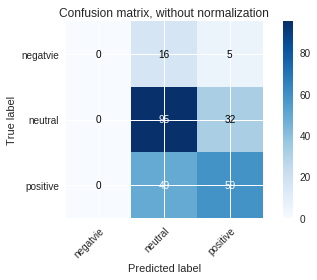

In [0]:
# calculate and print the confusion matrix
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


class_names = ['negatvie','neutral','positive']
# class_names = ['positive','neutral','negatvie']

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plot_confusion_matrix(df['orginal_label'], df['scores'], classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()


In [0]:
# Using TPOT to analyze the sentiment
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 22 14:20:50 2019

@author: autpx
"""

from tpot import TPOTClassifier
import numpy as np
import pandas as pd

pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,random_state=42, verbosity=2)

merged = pd.read_csv('./book1.csv')
merged['score'] = merged.apply(lambda x: (x['score'] +1)/2, axis=1)
merged['col3'] = merged['scores'] * merged['magnitude']
merged['l'] = ydata

merged = merged.iloc[:,2:]

yy = np.array(ydata)
datac = np.mat(merged)
#datac = np.concatenate((merged, yy),axis =1)
random.shuffle(datac)


xc_t = datac[:,:-1][:1200,]
xc_v = datac[:,:-1][1201:,]
yt = [x[0] for x in datac[:,-1][:1200,].astype(np.int32).tolist()]
yv = [x[0] for x in datac[:,-1][1201:,].astype(np.int32).tolist()]


pipeline_optimizer.fit(xc_t, yt)

print(pipeline_optimizer.score(xc_v, yv))

pipeline_optimizer.export('./tpot_exported_pipeline.py')



from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import FunctionTransformer
from copy import copy

exported_pipeline = make_pipeline(
    make_union(
        FunctionTransformer(copy),
        FunctionTransformer(copy)
    ),
    GradientBoostingClassifier(learning_rate=0.5, max_depth=6, max_features=0.9000000000000001, min_samples_leaf=1, min_samples_split=13, n_estimators=100, subsample=0.6000000000000001)
)
    
    
training_features, training_target = xc_t, yt

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(xc_v)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yv, results)

#np.set_printoptions(precision=2)
#cm_normalized = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
#print(cm_normalized)

from plot_cm import plot_confusion_matrix
plot_confusion_matrix(cm,
                      normalize    = False,
                      target_names = ['po', 'n', 'ng'],
                      title        = "Confusion Matrix")